<h3 style='text-align: center;'>Lets Grow More</h3>
<h1 align="center">Exploratory Data Analysis on Dataset-Terrorism</h1> 
<div style="text-align: right">Created<br>
-- by Ruhit Debnath<br>
-- for Lets Grow More<br>
-- May, 2023</div>

In [13]:
# Importing the Header Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [14]:
# Reading dataset
data=pd.read_csv('globalterrorismdb_0718dist.csv', encoding= "ISO-8859-1", low_memory=False)

In [15]:
# Reading first few  values from dataset
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
# Reading last few values from dataset
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [17]:
# Renaming the columns for better understanding
data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
           'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
           'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
           'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)

In [18]:
# Deleting the unnecassary columns
data=data[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
           'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [19]:
#  Getting Updated first few values from dataset
data.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [20]:
#Total number of rows and columns
data.shape

(181691, 19)

In [21]:
data.describe

<bound method NDFrame.describe of         Year  Month  Extended  Day             Country            State  \
0       1970      7         0    2  Dominican Republic              NaN   
1       1970      0         0    0              Mexico          Federal   
2       1970      1         0    0         Philippines           Tarlac   
3       1970      1         0    0              Greece           Attica   
4       1970      1         0    0               Japan          Fukouka   
...      ...    ...       ...  ...                 ...              ...   
181686  2017     12         0   31             Somalia  Middle Shebelle   
181687  2017     12         0   31               Syria         Lattakia   
181688  2017     12         0   31         Philippines      Maguindanao   
181689  2017     12         0   31               India          Manipur   
181690  2017     12         0   31         Philippines      Maguindanao   

                             Region           City   Latitude   L

In [22]:
# Checking of any null values in dataset
data.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

## Top 10 Countries With Most Terrorist attacks


In [23]:
print(data['Country'].value_counts().head(10))

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


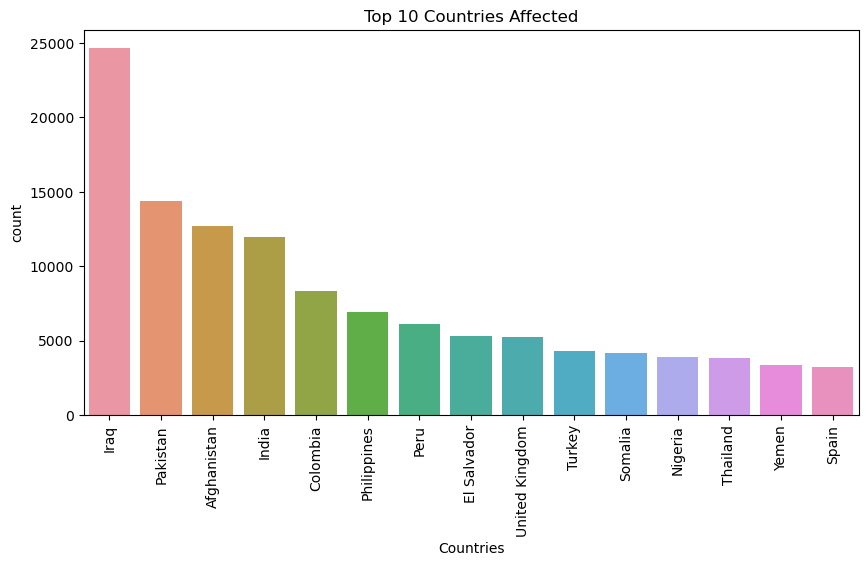

In [24]:
plt.figure(figsize = (10,5))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values)
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Colclusion :
#### 1. Most Affected Country > Iraq.
#### 2. Among top 10 affected countries five are asian.

# States with most terrorist attacks

In [25]:
print(data['State'].value_counts().head(10))

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


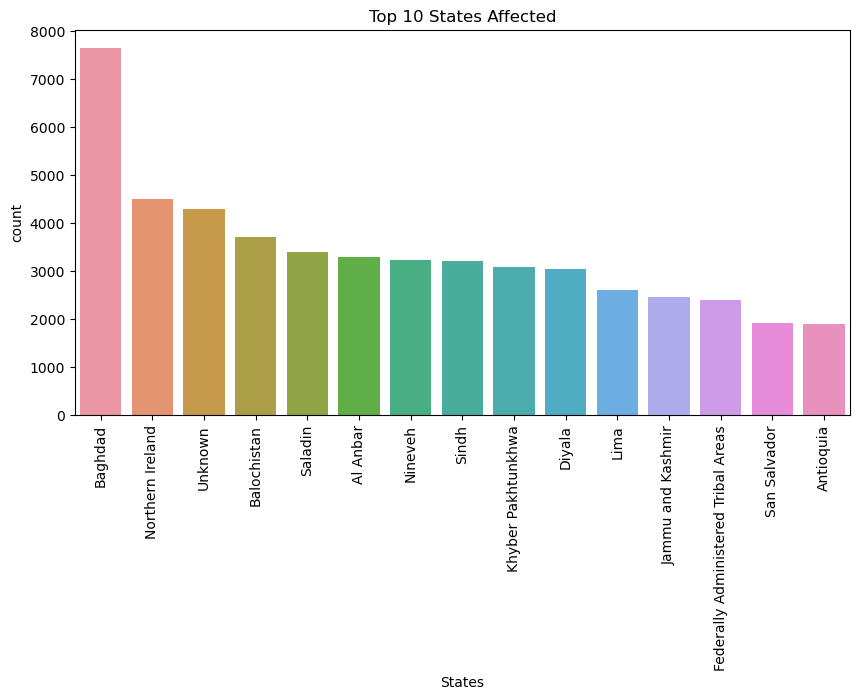

In [26]:
plt.figure(figsize = (10,5))
sns.barplot(data['State'].value_counts()[:15].index,data['State'].value_counts()[:15].values)
plt.title('Top 10 States Affected')
plt.xlabel('States')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Most Affected State: Baghdad

# Indian States With Most Terrorist Attacks

In [27]:
data_istates=data[data['Country']=='India']['State']
data_istates.value_counts()[:10]

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: State, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


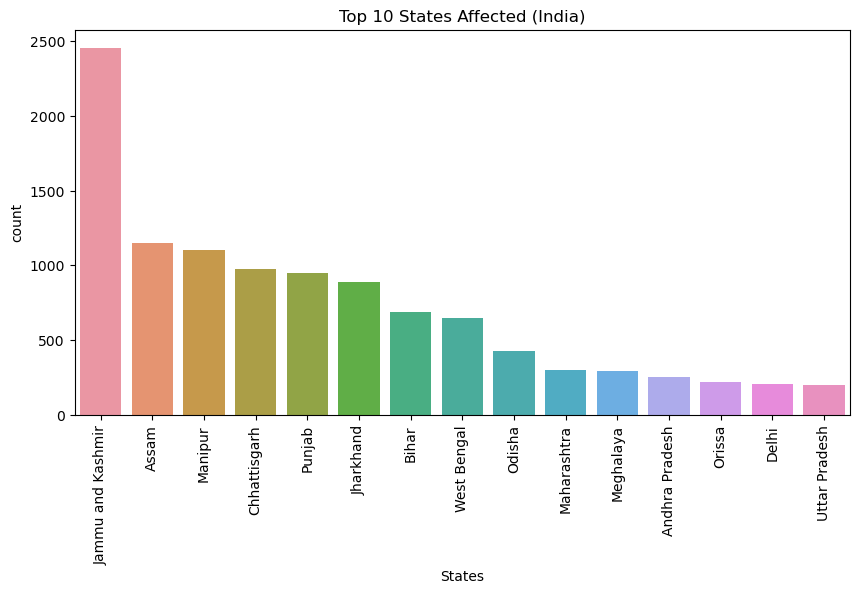

In [28]:
plt.figure(figsize = (10,5))
sns.barplot(data_istates.value_counts()[:15].index,data_istates.value_counts()[:15].values)
plt.title('Top 10 States Affected (India)')
plt.xlabel('States')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Most Affected State in India: Jammu & Kashmir

# Cities With Most Terrorist Attacks

In [29]:
print(data['City'].value_counts().head(10))

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


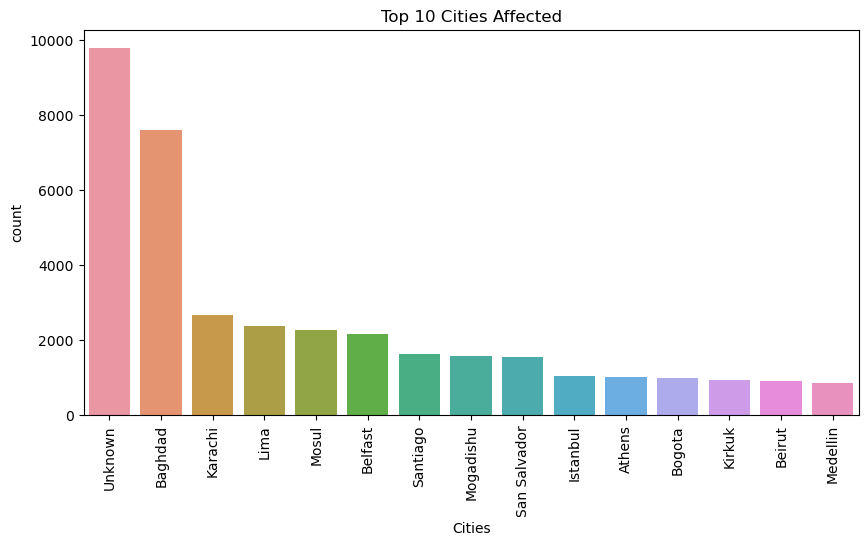

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(data['City'].value_counts()[:15].index,data['City'].value_counts()[:15].values)
plt.title('Top 10 Cities Affected')
plt.xlabel('Cities')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

## Cities With Most Terrorist attacks is Baghdad since the first one is unknown.

# Regions With Most Terrorist Attacks

In [31]:
print(data['Region'].value_counts().head(10))

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


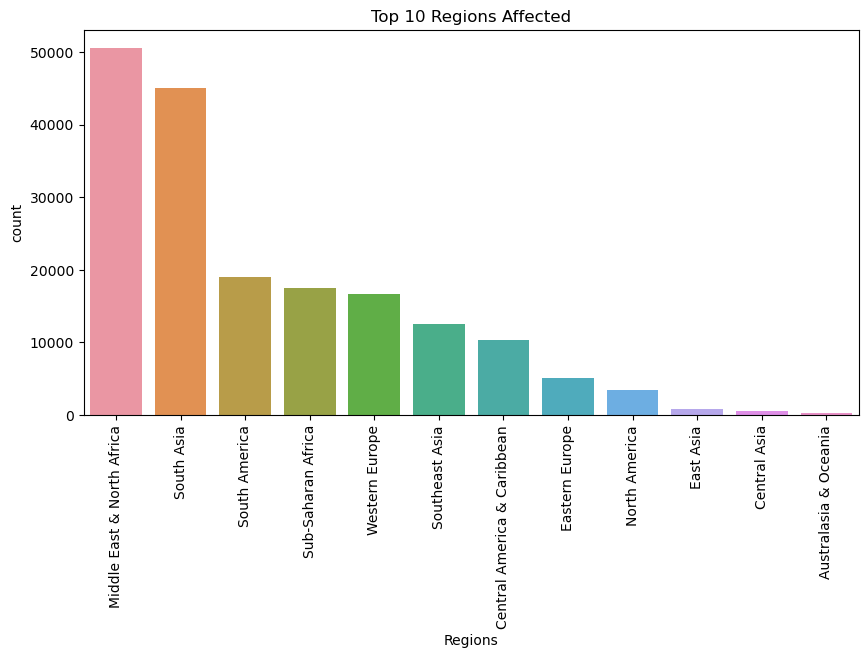

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(data['Region'].value_counts()[:15].index,data['Region'].value_counts()[:15].values)
plt.title('Top 10 Regions Affected')
plt.xlabel('Regions')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

# Years With Most Terrorist Activity

In [33]:
print(data['Year'].value_counts().head(10))

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


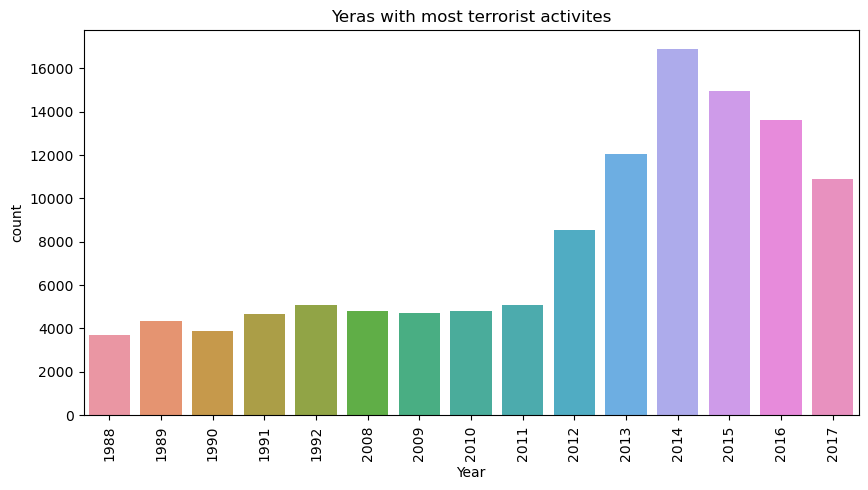

In [38]:
plt.figure(figsize = (10,5))
sns.barplot(data['Year'].value_counts()[:15].index,data['Year'].value_counts()[:15].values)
plt.title('Yeras with most terrorist activites')
plt.xlabel('Year')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

# Year with the most Terrorist Activities : 2014

# Most involved Terrorist Groups

In [35]:
print(data['Group'].value_counts().head(10))

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


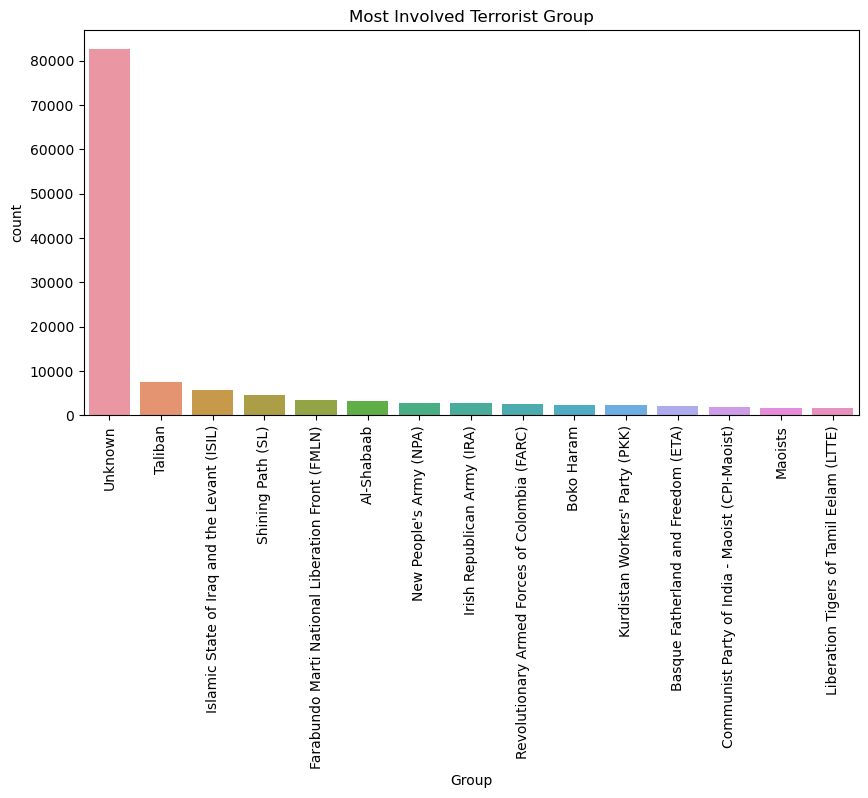

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(data['Group'].value_counts()[:15].index,data['Group'].value_counts()[:15].values)
plt.title('Most Involved Terrorist Group')
plt.xlabel('Group')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

# Most Active Terrorist Group is Taliban


# Conclusion:
### 1. Most afeected country: Iraq
### 2. Most affected state: Baghdad
### 3. Most affected state in india: Jammu & Kashmir
### 4. Years with most terrorist attacks:2014
### 5. Most active terrorist group: Taliban

# THANKYOU!!